<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Definir o tamanho das figuras para todos os plots**

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## United States Macroeconomic Dataset

In [3]:
macro_data = sm.datasets.macrodata.load_pandas()

In [4]:
macro_data.data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [5]:
macro_data = macro_data.data

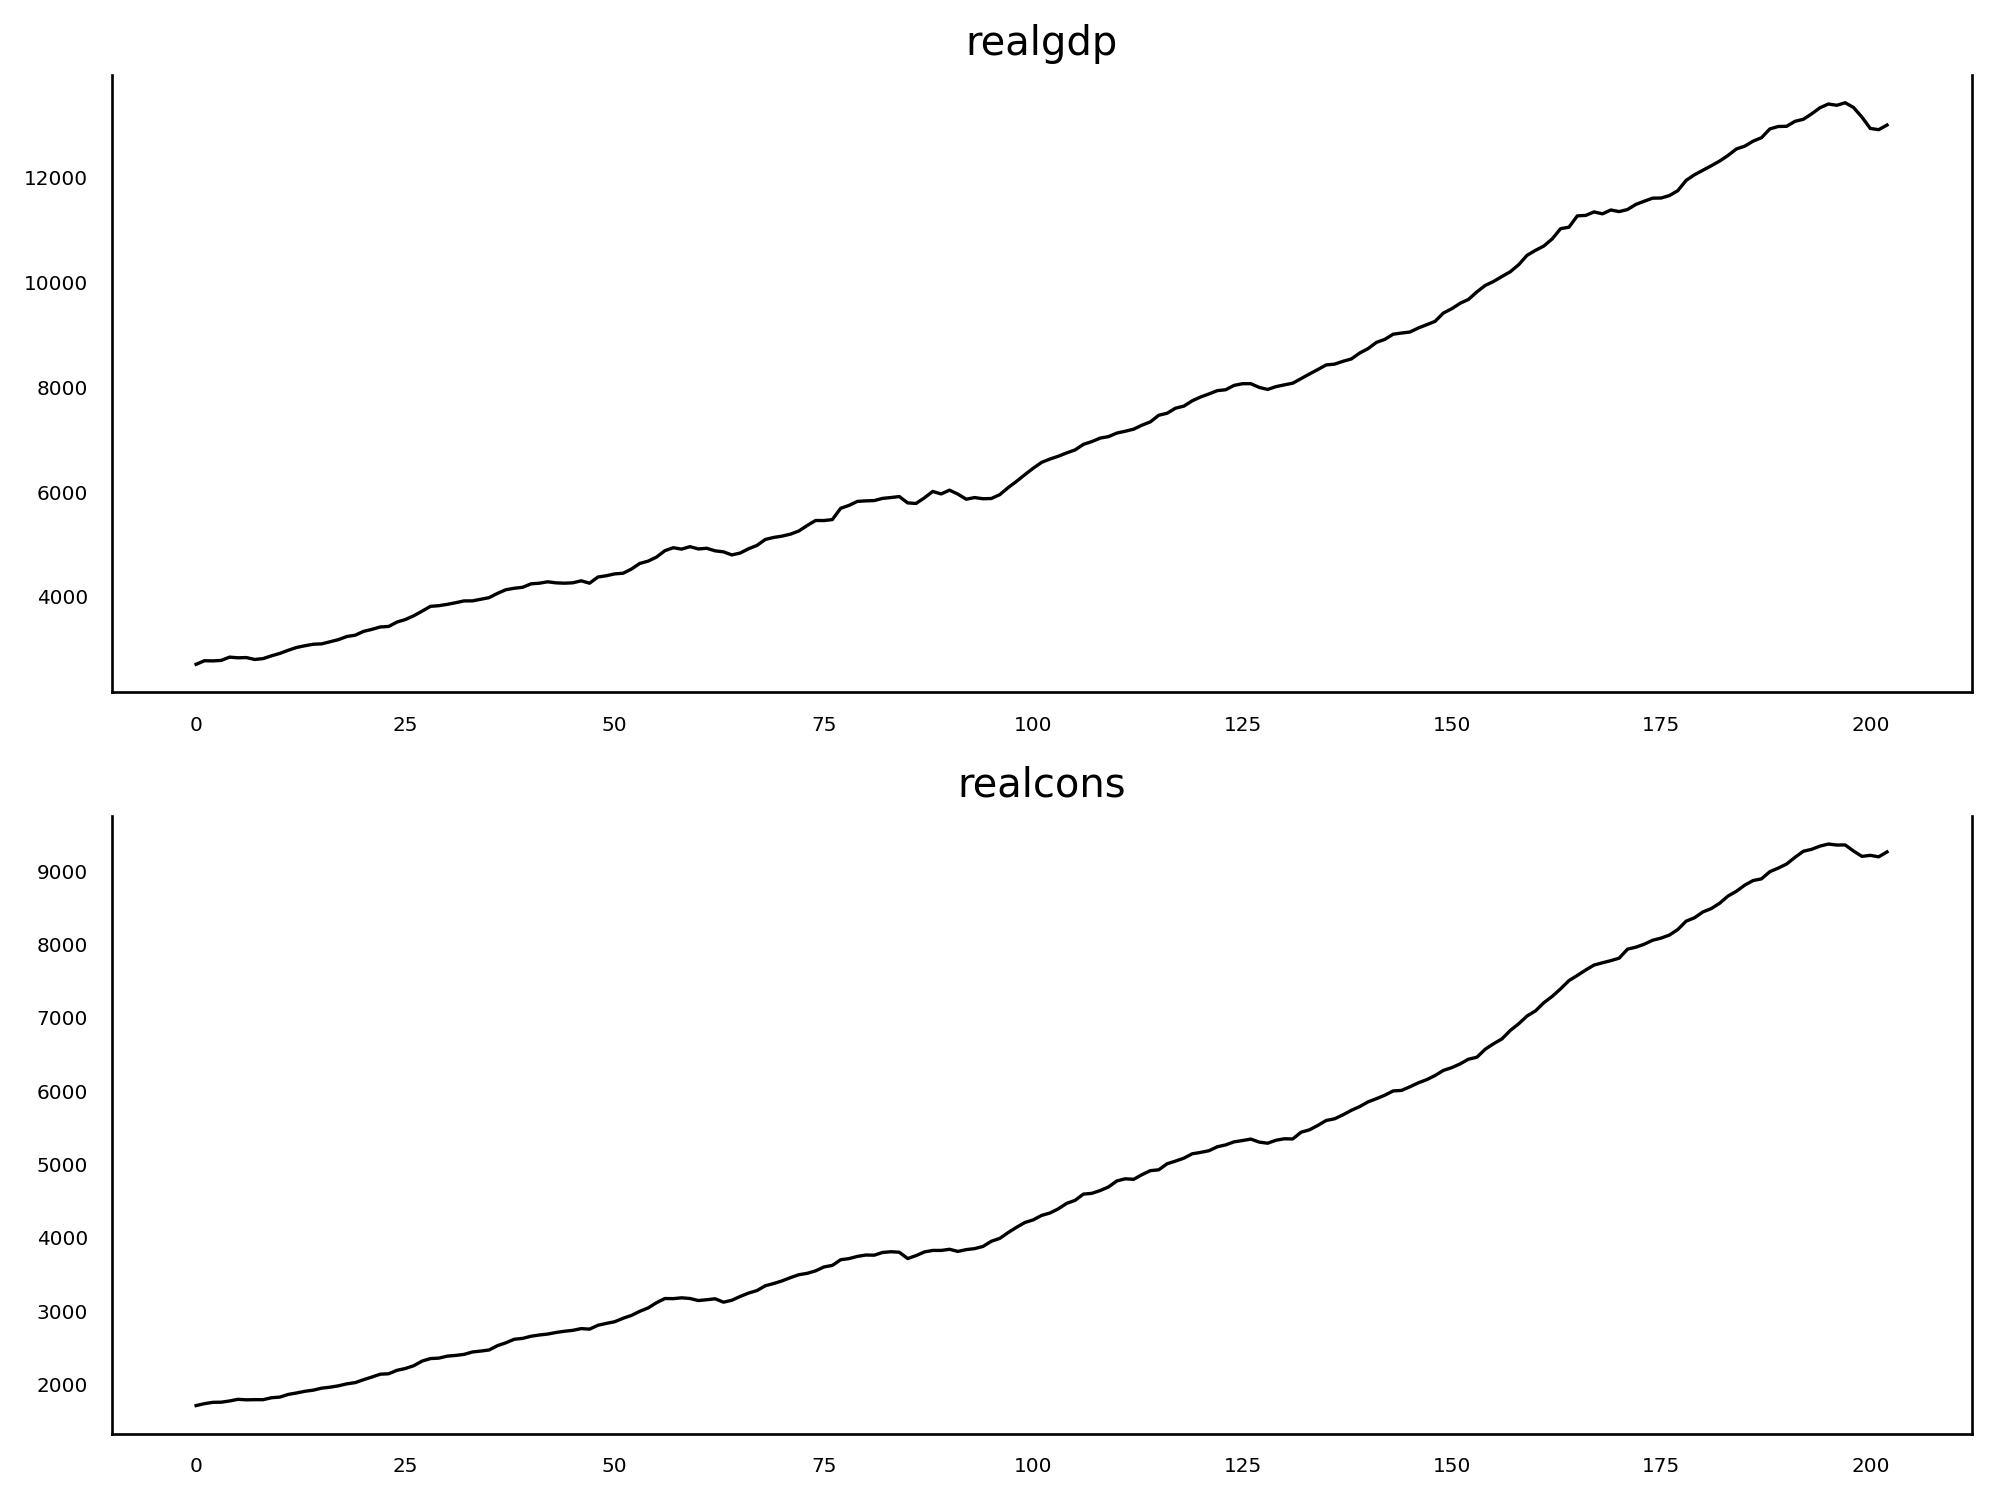

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi=240)

ax1.plot(macro_data['realgdp'], color='black', linewidth=1)
ax1.set_title('realgdp')
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)

ax2.plot(macro_data['realcons'], color='black', linewidth=1)
ax2.set_title('realcons')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.spines['top'].set_alpha(0)
ax2.tick_params(labelsize=6)

In [13]:
ad_fuller_result_1 = adfuller(macro_data['realgdp'].diff()[1:])
ad_fuller_result_2 = adfuller(macro_data['realcons'].diff()[1:])

In [14]:
print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'P-value: {ad_fuller_result_1[1]}')

print('\n---------------------------------\n')

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'P-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -6.305695561658106
P-value: 3.327882187668224e-08

---------------------------------

realcons
ADF Statistic: -4.204306080845247
P-value: 0.0006479282158627571


In [27]:
def optimize_VAR(endog):

  """
  Returns a dataframe with parameters ans corresponding MSE

  endog - observed time series
  """

  results = []

  for i in tqdm_notebook(range(15)):

    try:
      model = VARMAX(endog, order=(i, 0)).fit(disp=False)
    except:
      continue

    aic = model.aic

    results.append([i, aic])

  result_df = pd.DataFrame(results)
  result_df.columns = ['p', 'aic']
  result_df.sort_values(by='aic', ascending=True).reset_index(drop=True)

  return result_df

In [28]:
endog = macro_data[['realgdp', 'realcons']]
result_df = optimize_VAR(endog)
result_df

  0%|          | 0/15 [00:00<?, ?it/s]

,p,aic
0,1,12673.387977
1,2,172149.722167
2,3,4058.306149
3,4,4037.512940
4,5,4045.865692
5,6,4051.041411
6,7,4057.646745
7,8,4062.250752
8,9,4066.281382
9,10,4066.736077


In [29]:
best_model = VARMAX(endog, order=(12, 0))
res = best_model.fit(disp=False)
print(res.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realgdp', 'realcons']   No. Observations:                  203
Model:                             VAR(12)   Log Likelihood               -1983.601
                               + intercept   AIC                           4073.203
Date:                     Tue, 16 Aug 2022   BIC                           4248.803
Time:                             15:27:18   HQIC                          4144.244
Sample:                                  0                                         
                                     - 203                                         
Covariance Type:                       opg                                         
Ljung-Box (Q):                30.05, 36.58   Jarque-Bera (JB):          5.23, 10.39
Prob(Q):                        0.87, 0.63   Prob(JB):                   0.07, 0.01
Heteroskedasticity (H):         1.74, 2.58   Skew:                       0.3

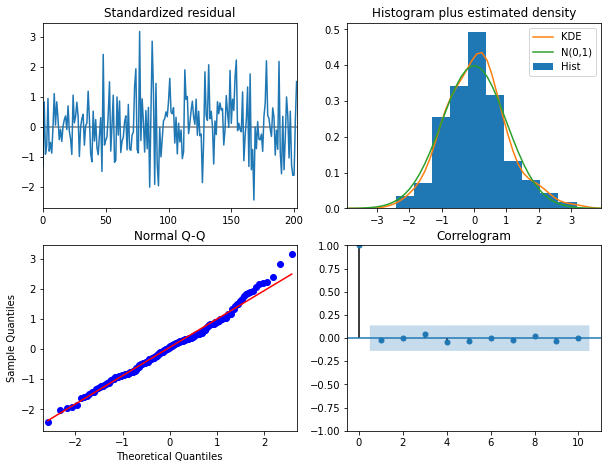

In [30]:
res.plot_diagnostics();